In [2]:
%pylab
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import seaborn as sns
sns.set()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [3]:
import glob, re, itertools
import statsmodels.api as sm

In [4]:
results = []
for f in glob.glob('./experiment_regs_*.npy'):
    i = tuple(map(int,re.match('./experiment_regs_([0-9]+)_([0-9]+)_([0-9]+).npy',f).groups()))
    if i[-1]<=4:
        results.append((i,np.load(f)))
    

In [5]:
results.sort()
results_mean = {k:
    np.mean([np.cumsum(np.real(x[1])) for x in g],0)
    for k,g in itertools.groupby(results,key=lambda x: x[0][:2])
}
results_len = {k:
    len(list(g))
    for k,g in itertools.groupby(results,key=lambda x: x[0][:2])
}

In [6]:
results_len

{(0, 0): 5,
 (0, 1): 5,
 (0, 2): 5,
 (0, 3): 5,
 (0, 4): 5,
 (0, 5): 5,
 (0, 6): 5,
 (0, 7): 5,
 (0, 8): 5,
 (0, 9): 5,
 (0, 10): 5,
 (1, 0): 5,
 (1, 1): 5,
 (1, 2): 5,
 (1, 3): 5,
 (1, 4): 5,
 (1, 5): 5,
 (1, 6): 5,
 (1, 7): 5,
 (1, 8): 5,
 (1, 9): 5,
 (1, 10): 5,
 (2, 0): 5,
 (2, 1): 5,
 (2, 2): 5,
 (2, 3): 5,
 (2, 4): 5,
 (2, 5): 5,
 (2, 6): 5,
 (2, 7): 5,
 (2, 8): 5,
 (2, 9): 5,
 (2, 10): 5,
 (3, 0): 5,
 (3, 1): 5,
 (3, 2): 5,
 (3, 3): 5,
 (3, 4): 5,
 (3, 5): 5,
 (3, 6): 5,
 (3, 7): 5,
 (3, 8): 5,
 (3, 9): 5,
 (3, 10): 5,
 (4, 0): 5,
 (4, 1): 5,
 (4, 2): 5,
 (4, 3): 5,
 (4, 4): 5,
 (4, 5): 5,
 (4, 6): 5,
 (4, 7): 5,
 (4, 8): 5,
 (4, 9): 5,
 (4, 10): 5,
 (5, 0): 5,
 (5, 1): 5,
 (5, 2): 5,
 (5, 3): 5,
 (5, 4): 5,
 (5, 5): 5,
 (5, 6): 5,
 (5, 7): 5,
 (5, 8): 5,
 (5, 9): 5,
 (5, 10): 4}

In [7]:
probparams = [
    dict(beta=1.5, sigma=0.05),
    dict(beta=2.5, sigma=0.05),
    dict(beta=3.5, sigma=0.05),
    dict(beta=4.5, sigma=0.05),
    dict(beta=5.5, sigma=0.05),
    dict(beta=6.5, sigma=0.05)
]

algparams = [
    dict(beta=0.5,  c1=.5, c2=1.),
    dict(beta=1.5,  c1=.5, c2=1.),
    dict(beta=2.5,  c1=.5, c2=1.),
    dict(beta=3.5,  c1=.5, c2=1.),
    dict(beta=4.5,  c1=.5, c2=1.),
    dict(beta=5.5,  c1=.5, c2=1.),
    dict(beta=6.5,  c1=.5, c2=1.),
    dict(beta=7.5,  c1=.5, c2=1.),
    dict(beta=8.5,  c1=.5, c2=1.),
    dict(beta=9.5,  c1=.5, c2=1.),
    dict(beta=10.5, c1=.5, c2=1.),
]

T = 20000
d = 2

In [8]:
T0=int(T/2.)
coeffs = {k: 
          sm.OLS(np.log(results_mean[k][T0:]),sm.add_constant(np.log(np.arange(T)[T0:]))).fit().params[1] 
          for k in results_mean}


In [104]:
coeffs2 = {k: 
          sm.OLS(np.log(results_mean[k][int(T/4):int(T/2)]),sm.add_constant(np.log(np.arange(T)[int(T/4):int(T/2)]))).fit().params[1] 
          for k in results_mean}
coeffs3 = {k: 
          sm.OLS(np.log(results_mean[k][int(T/8):int(T/4)]),sm.add_constant(np.log(np.arange(T)[int(T/8):int(T/4)]))).fit().params[1] 
          for k in results_mean}
coeffs4 = {k: 
          sm.OLS(np.log(results_mean[k][int(T/16):int(T/8)]),sm.add_constant(np.log(np.arange(T)[int(T/16):int(T/8)]))).fit().params[1] 
          for k in results_mean}


In [55]:
style.use('seaborn')
rc('text', usetex=True)
rc('font', size=22)

In [85]:
def adjustFigAspect(fig,aspect=1):
    '''
    Adjust the subplot parameters so that the figure has the correct
    aspect ratio.
    '''
    xsize,ysize = fig.get_size_inches()
    minsize = min(xsize,ysize)
    xlim = .4*minsize/xsize
    ylim = .4*minsize/ysize
    if aspect < 1:
        xlim *= aspect
    else:
        ylim /= aspect
    fig.subplots_adjust(left=.5-xlim,
                        right=.5+xlim,
                        bottom=.5-ylim,
                        top=.5+ylim)


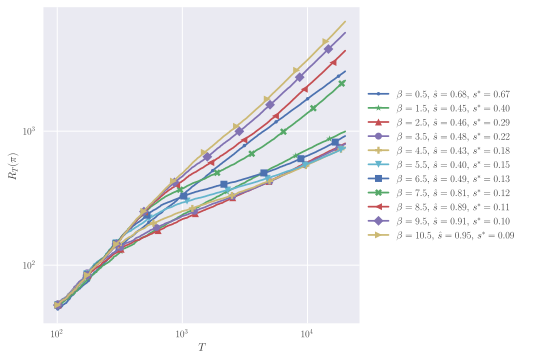

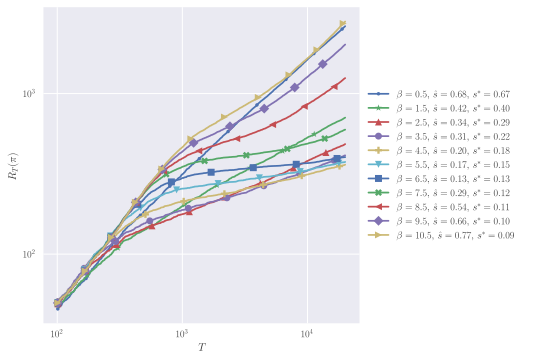

In [100]:
for prob in [0,4]:#range(len(probparams)):
    fig=figure()
    xscale('log')
    yscale('log')
    beta0 = probparams[prob]['beta']
    marker = itertools.cycle(('.', '*','^', 'o', 'P','v','s','X','<','D','>')) 
    for j in range(len(algparams)):
        beta = algparams[j]['beta']
        plot(np.arange(100+1,T+1),results_mean[prob,j][100:],marker = next(marker),markevery=.1,
             label=
             r'$\beta={:.1f},\,\hat s={:.2f},\,s^*={:.2f}$'
            .format(beta,coeffs[prob,j],d/(2*beta+d)))
    #     title(r'$\beta_0={:.1f}$'%beta0)
    #     plot(np.arange(100+1,T+1),0.5*np.arange(100+1,T+1),'k--')
    legend(loc='center left', bbox_to_anchor=(1, 0.5))
    xlabel(r'$T$')
    ylabel(r'$R_T(\pi)$')
    #     plt.show()
    adjustFigAspect(fig)
    savefig('regret_{:.1f}.pdf'.format(beta0),bbox_inches = 'tight',pad_inches = 0)



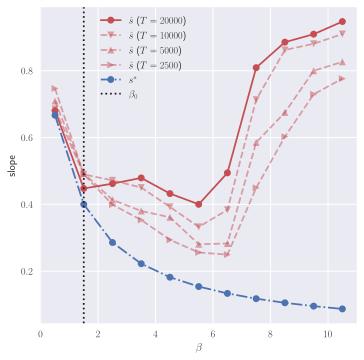

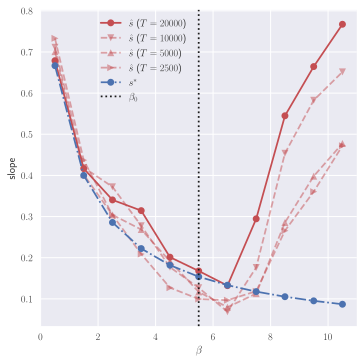

In [125]:
for prob in [0,4]:
# prob=4
    fig=figure()
    plot()
    beta0 = probparams[prob]['beta']
    plot( [algparams[j]['beta'] for j in range(len(algparams))], [coeffs[prob,j] for j in range(len(algparams))] , 'ro-', label=r'$\hat s$ ($T=20000$)')
    plot( [algparams[j]['beta'] for j in range(len(algparams))], [coeffs2[prob,j] for j in range(len(algparams))] , 'rv--', alpha=0.5, label=r'$\hat s$ ($T=10000$)')
    plot( [algparams[j]['beta'] for j in range(len(algparams))], [coeffs3[prob,j] for j in range(len(algparams))] , 'r^--', alpha=0.5, label=r'$\hat s$ ($T=5000$)')
    plot( [algparams[j]['beta'] for j in range(len(algparams))], [coeffs4[prob,j] for j in range(len(algparams))] , 'r>--', alpha=0.5, label=r'$\hat s$ ($T=2500$)')
    plot( [algparams[j]['beta'] for j in range(len(algparams))], [d/(2*algparams[j]['beta']+d) for j in range(len(algparams))] , 'bo-.', label=r'$s^*$')
    axvline(beta0, color='k', linestyle=':', label=r'$\beta_0$')
    xlabel(r'$\beta$')
    ylabel(r'slope')
    legend(bbox_to_anchor=(0.5, 1), loc='upper right')
    adjustFigAspect(fig)
    savefig('slope_{:.1f}.pdf'.format(beta0),bbox_inches = 'tight',pad_inches = 0)
# forceAspect(plt.gca())
# axes.set_aspect(10)
#     plt.axes().set_aspect(aspect=10)
#     xlim(0,11)
